In [8]:
from file_reader import read_csv_url

# Read in file: 
# Load from URL
url_airbnb = "https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz"
df_airbnb = read_csv_url(url_airbnb, compression="gzip")



Successfully loaded from URL: https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz
Preview of first 5 rows and columns:
       id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source  
0  city scrape  
1  city scrape  
2  city scrape  
3  city scrape  
4  city scrape  


In [9]:
print(df_airbnb.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [11]:
df_airbnb['avg_stay'] = (df_airbnb['minimum_nights'] + df_airbnb['maximum_nights']) / 2
overall_avg_stay = df_airbnb['avg_stay'].mean()
print(f"The overall average stay is {overall_avg_stay:.2f} nights.")

over_90_count = (df_airbnb['avg_stay'] > 90).sum()
print(f"The number of properties with an average stay over 90 days is {over_90_count}.")

The overall average stay is 3043.98 nights.
The number of properties with an average stay over 90 days is 65809.


In [13]:
total_properties = len(df_airbnb) 
print(f"Total number of properties: {total_properties}")

Total number of properties: 96651


In [16]:
# =========================================================================================
# This estimate calculates the average length of stay per guest by dividing each 
# listing’s total booked nights over the past year (estimated_occupancy_l365d) by 
# an adjusted count of bookings, inferred from review volume (number_of_reviews_ltm / 0.7). 
# =========================================================================================

# Estimate number of bookings per listing (assuming 70% of guests leave reviews)
df_airbnb['estimated_bookings'] = df_airbnb['number_of_reviews_ltm'] / 0.7

# Estimate average length of stay per guest
df_airbnb['avg_stay_per_guest'] = df_airbnb['estimated_occupancy_l365d'] / df_airbnb['estimated_bookings']

# Drop infinite or NaN values (e.g. listings with zero reviews or zero occupancy)
df_airbnb_cleaned = df_airbnb[
    df_airbnb['avg_stay_per_guest'].notna() &
    df_airbnb['avg_stay_per_guest'].apply(lambda x: x != float('inf'))
]

# Compute overall average stay per guest
overall_avg_stay_per_guest = df_airbnb_cleaned['avg_stay_per_guest'].mean()
print(f"Estimated average length of stay per guest over the past year: {overall_avg_stay_per_guest:.2f} nights")

# Count listings with estimated average stay over 90 nights
over_90_count = (df_airbnb_cleaned['avg_stay_per_guest'] > 90).sum()
print(f"Number of listings with estimated average stay over 90 nights: {over_90_count}")

# Find the maximum estimated average stay
max_stay = df_airbnb_cleaned['avg_stay_per_guest'].max()
print(f"Maximum estimated average stay recorded: {max_stay:.2f} nights")

Estimated average length of stay per guest over the past year: 7.51 nights
Number of listings with estimated average stay over 90 nights: 69
Maximum estimated average stay recorded: 178.50 nights



 Missing values by column (top 12):
calendar_updated                96651
neighbourhood_group_cleansed    96651
license                         96651
neighborhood_overview           54668
neighbourhood                   54667
host_neighbourhood              50360
avg_stay_per_guest              48347
host_about                      47337
beds                            33975
price                           33967
estimated_revenue_l365d         33967
bathrooms                       33921
dtype: int64

🧮 Total columns with missing values: 41

 Plotting histogram of missing values per row (cutoff = 5)


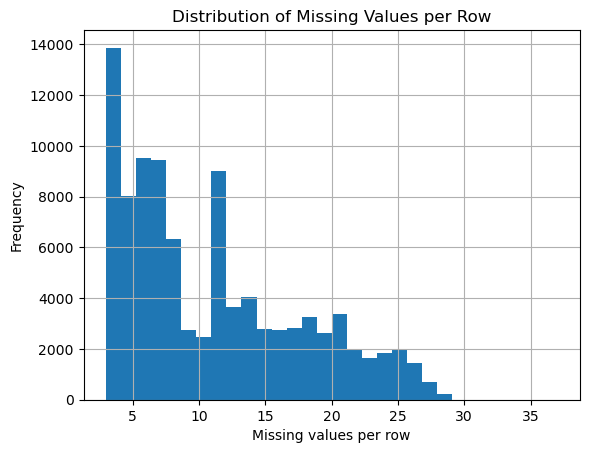


 Original row count: 96,651
After dropping rows with > 5 NaNs: 21,871 rows


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_stay,estimated_bookings,avg_stay_per_guest
0,264776,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,NaN,t,11,11,0,0,0.51,184.0,17.142857,6.416667
1,264777,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,NaN,t,11,11,0,0,0.22,184.0,5.714286,6.475000
2,264778,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,...,NaN,t,11,11,0,0,0.43,184.0,8.571429,6.416667
3,264779,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,...,NaN,t,11,11,0,0,0.30,184.0,10.000000,6.400000
4,264780,https://www.airbnb.com/rooms/264780,20250610032232,2025-06-11,city scrape,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,1389063,...,NaN,t,11,11,0,0,0.35,184.0,5.714286,6.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96121,1434704623088271991,https://www.airbnb.com/rooms/1434704623088271991,20250610032232,2025-06-12,city scrape,Luxury Modern 2-Bed Flat in Chic Chelsea,Experience modern luxury in the heart of Chels...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,505170074,...,NaN,t,6,6,0,0,1.00,563.0,1.428571,6.300000
96149,1434719796276859612,https://www.airbnb.com/rooms/1434719796276859612,20250610032232,2025-06-12,city scrape,"Two bedroom apartment in The City, Minories, EC3N",NaN,The minimum age for check-in is 25<br />Smokin...,https://a0.muscache.com/pictures/prohost-api/H...,172457906,...,NaN,t,41,40,1,0,1.00,183.0,1.428571,6.300000
96311,1435596663465753487,https://www.airbnb.com/rooms/1435596663465753487,20250610032232,2025-06-12,city scrape,Cozy 1BR in South Kensington,✨ Elegant 1-bed flat in the heart of South Ken...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,32423116,...,NaN,t,34,34,0,0,1.00,90.5,1.428571,6.300000
96382,1437468884839098057,https://www.airbnb.com/rooms/1437468884839098057,20250610032232,2025-06-13,city scrape,6 People - Central London - Zone 1,The room sleeps six people there is two double...,mornington crescent underground 2-3 minutes wa...,https://a0.muscache.com/pictures/hosting/Hosti...,131418248,...,NaN,f,70,0,70,0,1.00,4.0,1.428571,6.300000


In [17]:
from file_reader import clean_missing_values

clean_missing_values(df_airbnb)